![](../img/chinahadoop.png)

# 链家数据分析项目
**[小象学院](http://www.chinahadoop.cn/course/landpage/15)《机器学习集训营》课程资料 by [@寒小阳](https://www.chinahadoop.cn/user/49339/about)**

我们用爬虫爬取了一点链家网的数据，在这做一点小小的数据分析。大家的大作业中也有和它类似的项目，大家一定要巩固知识哦。

## 载入数据

In [1]:
import pandas as pd
lj_data = pd.read_csv('../data/LJdata.csv')

大家规范一点，用英文的column name，这样免去了后续的一些问题(主要是编码问题)

In [2]:
lj_data.columns

Index(['区域', '地址', '标题', '户型', '面积', '价格', '楼层', '建造时间', '朝向', '更新时间', '看房人数',
       '备注', '链接地址'],
      dtype='object')

In [3]:
lj_data.head()

,区域,地址,标题,户型,面积,价格,楼层,建造时间,朝向,更新时间,看房人数,备注,链接地址
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html


In [11]:
lj_data[[u'看房人数', u'地址']]

,看房人数,地址
0,26,新源街
1,33,澳洲康都
2,34,远见名苑
3,30,天通苑北一区
4,30,团结湖北口
...,...,...
2755,13,天鹅湾北区
2756,14,水星园
2757,7,莲花小区
2758,6,中海紫御公馆


In [12]:
# 为了方便，我们将列标设置为英文
lj_data.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']

Perfect, 然后咱们就可以开始做点分析了

## 查看数据的形状和信息
提示:都还记得info/describe/shape的用法吧，用起来！

In [13]:
# your code here
lj_data.shape

(2760, 13)

In [14]:
lj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
district       2760 non-null object
address        2760 non-null object
title          2760 non-null object
house_type     2760 non-null object
area           2760 non-null object
price          2760 non-null int64
floor          2760 non-null object
build_time     2758 non-null object
direction      2760 non-null object
update_time    2760 non-null object
view_num       2760 non-null int64
extra_info     2760 non-null object
link           2760 non-null object
dtypes: int64(2), object(11)
memory usage: 280.4+ KB


In [15]:
lj_data.describe(include='all')

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
count,2760,2760,2760,2760,2760,2760.000000,2760,2758,2760,2760,2760.000000,2760,2760
unique,208,1473,2369,24,203,NaN,105,138,35,14,NaN,1343,2381
top,望京租房,远洋山水,禾乔丽致公寓 诚意出租 看房随时 有钥匙,2室1厅,57平米,NaN,高楼层(共6层),2004年建塔楼,南 北,2017.07.26,NaN,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101701372.html
freq,109,19,4,1284,63,NaN,323,78,1009,634,NaN,469,3
mean,NaN,NaN,NaN,NaN,NaN,7570.800725,NaN,NaN,NaN,NaN,13.448913,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6316.204986,NaN,NaN,NaN,NaN,12.746202,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1300.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4500.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,6000.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8500.000000,NaN,NaN,NaN,NaN,19.000000,NaN,NaN


## 找到最近更新信息的20套房子
提示：找到能体现更新信息的字段，然后做排序！

In [16]:
lj_data.columns

Index(['district', 'address', 'title', 'house_type', 'area', 'price', 'floor',
       'build_time', 'direction', 'update_time', 'view_num', 'extra_info',
       'link'],
      dtype='object')

In [23]:
# 按升序排列
lj_data.sort_values(by='update_time').tail()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
2351,马甸租房,裕民东里,裕民东里 1室1厅 5500元,1室1厅,44平米,5500,中楼层(共18层),1988年建塔楼,南,2017.07.27,1,距离10号线健德门站903米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101856026.html
2352,滨河西区租房,绮霞苑,绮霞苑带电梯两居室 南北通透 采光好,2室1厅,90平米,4500,高楼层(共13层),2003年建板楼,南 北,2017.07.27,5,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101819138.html
479,潞苑租房,华龙小区,华龙小区精装两居室，家电齐全，拎包入住,2室1厅,80平米,2600,高楼层(共6层),1998年建板楼,南 北,2017.07.27,8,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101764783.html
2344,回龙观租房,北京人家,北京人家正规电梯层北向一居室，精装修。,1室1厅,56平米,4000,高楼层(共9层),2005年建板塔结合,北,2017.07.27,6,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101819017.html
2148,金融街租房,丰汇园小区,实验 精装一居 温馨舒适 居家,1室1厅,50平米,7000,低楼层(共12层),1999年建板塔结合,东,2017.07.27,8,距离4号线灵境胡同站908米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101800503.html


## 平均看房人数

In [24]:
lj_data['view_num'].mean()

13.44891304347826

In [25]:
lj_data['view_num'].median()

10.0

## 房龄最小的20套房子的平均看房人数、平均面积

In [26]:
lj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
district       2760 non-null object
address        2760 non-null object
title          2760 non-null object
house_type     2760 non-null object
area           2760 non-null object
price          2760 non-null int64
floor          2760 non-null object
build_time     2758 non-null object
direction      2760 non-null object
update_time    2760 non-null object
view_num       2760 non-null int64
extra_info     2760 non-null object
link           2760 non-null object
dtypes: int64(2), object(11)
memory usage: 280.4+ KB


In [29]:
import numpy as np
def get_age(x):
    try:
        return 2019-int(x[:4])
    except:
        return np.NaN
lj_data.loc[:, 'age'] = lj_data['build_time'].apply(get_age)

In [30]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,38.0
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,14.0
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,13.0
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,15.0
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,37.0


In [68]:
def get_area(x):
    return int(x[:-2])
lj_data.loc[:,'house_area'] = lj_data['area'].apply(get_area)

In [69]:
lj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 15 columns):
district       2760 non-null object
address        2760 non-null object
title          2760 non-null object
house_type     2760 non-null object
area           2760 non-null object
price          2760 non-null int64
floor          2760 non-null object
build_time     2758 non-null object
direction      2760 non-null object
update_time    2760 non-null object
view_num       2760 non-null int64
extra_info     2760 non-null object
link           2760 non-null object
age            2755 non-null float64
house_area     2760 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 323.6+ KB


In [66]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,house_area
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,38.0,50
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,14.0,79
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,13.0,86
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,15.0,103
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,37.0,63


In [34]:
lj_data.nsmallest(columns='age', n=20)[['view_num', 'house_area']].mean()

view_num      1.155000e+01
house_area    1.905958e+48
dtype: float64

## 房子价格的分布(平均，方差，中位数)

In [15]:
lj_data['price'].describe()

count      2760.000000
mean       7570.800725
std        6316.204986
min        1300.000000
25%        4500.000000
50%        6000.000000
75%        8500.000000
max      210000.000000
Name: price, dtype: float64

## 最受欢迎的朝向(平均看房人数)

In [35]:
lj_data.columns

Index(['district', 'address', 'title', 'house_type', 'area', 'price', 'floor',
       'build_time', 'direction', 'update_time', 'view_num', 'extra_info',
       'link', 'age', 'house_area'],
      dtype='object')

In [45]:
tmp = lj_data.loc[:, ['view_num', 'direction']].groupby('direction').agg('mean')
tmp.reset_index().sort_values(by='view_num', ascending=False).head(3)

,direction,view_num
1,东 东北,34.00
29,西 北,28.25
34,西南 西,25.00


## 房型数量分布

In [22]:
# value_counts:Return a Series containing counts of unique values.
lj_data['house_type'].value_counts()

2室1厅     1284
1室1厅      457
3室1厅      371
3室2厅      207
1室0厅      157
2室2厅      142
4室2厅       42
4室1厅       21
1室2厅       17
2室0厅        9
1房间1卫       8
5室2厅        8
2房间1卫       6
5室3厅        5
3房间2卫       4
5室1厅        4
3室3厅        3
4室3厅        3
3室0厅        3
3房间1卫       3
6室2厅        2
2房间2卫       2
6室3厅        1
5房间2卫       1
Name: house_type, dtype: int64

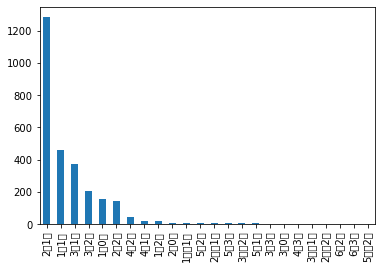

In [47]:
%matplotlib inline
lj_data['house_type'].value_counts().plot(kind='bar')

## 最受欢迎的房型

In [51]:
tmp = lj_data.loc[:, ['house_type','view_num']].groupby('house_type').agg('mean')
tmp.reset_index().sort_values(by='view_num', ascending=False).head(3)

,house_type,view_num
23,6室3厅,21.000000
7,2房间1卫,19.833333
2,1室2厅,17.058824


## 房子的平均租房价格(按平米算)

In [72]:
lj_data.loc[:, 'price_per_m2'] = lj_data['price']/lj_data['house_area']

In [73]:
lj_data.price_per_m2.mean()

87.72268429900454

## 最受关注的小区

In [29]:
lj_data.head(3)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,house_area,price_per_m2
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,38.0,50,116.000000
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,14.0,79,98.734177
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,13.0,86,93.023256


In [75]:
tmp = lj_data.loc[:, ['address','view_num']].groupby('address').agg('sum')
tmp.reset_index().sort_values(by='view_num', ascending=False).head(3)

,address,view_num
951,清芷园,246
369,卡布其诺,245
938,润枫水尚,217


## 出租房源最多的小区

In [76]:
lj_data['address'].value_counts().head(3)

远洋山水    19
润枫水尚    10
金地仰山     9
Name: address, dtype: int64

## 集中供暖和非集中供暖的有多少家，平均价格是多少

In [77]:
lj_data.loc[:,'center_heating'] = lj_data['extra_info'].apply(lambda x:'集中供暖' in x)

In [78]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,house_area,price_per_m2,center_heating
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,38.0,50,116.000000,True
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,14.0,79,98.734177,True
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,13.0,86,93.023256,False
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,15.0,103,51.456311,True
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,37.0,63,101.587302,True


In [79]:
lj_data.loc[:,['price','center_heating']].groupby('center_heating').agg('mean')

,price
center_heating,
False,7317.436975
True,7623.603327


## 不同房型的平均/最大/最小面积

In [80]:
lj_data.loc[:,['price','house_type']].groupby('house_type').agg(['mean','max','min'])

price                
                     mean     max     min
house_type                               
1室0厅          4945.541401   23000    1900
1室1厅          5442.735230   16000    1300
1室2厅          7664.705882   15000    2500
1房间1卫         3862.500000    4200    3600
2室0厅          5497.777778    6600    2980
2室1厅          6314.758567   26000    1500
2室2厅          8988.028169   35000    2200
2房间1卫         5100.000000    7200    2800
2房间2卫         7050.000000   10500    3600
3室0厅          6900.000000    7700    6500
3室1厅          9591.644205   32000    2200
3室2厅         13697.584541   40000    2600
3室3厅          6966.666667    7600    6500
3房间1卫         8533.333333   13000    5900
3房间2卫         5950.000000    8500    5000
4室1厅         14847.619048   32000    3500
4室2厅         15723.809524   45000    3500
4室3厅         12333.333333   15000   11000
5室1厅          6125.000000    9000    5000
5室2厅         17375.000000   32000    7500
5室3厅         15040.000000   30000    4500
5房间2卫        16000.000000   16000   16000
6室2厅         16500.000000   17000   16000
6室3厅        210000.000000  210000  210000

## 哪个地铁口附近的房子最多

In [38]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,house_area,price_per_m2,center_heating
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,38.0,50,116.000000,True
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,14.0,79,98.734177,True
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,13.0,86,93.023256,False
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,15.0,103,51.456311,True
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,37.0,63,101.587302,True


In [81]:
import re

def get_subway_info(string, pattern, n):
    result = re.search(pattern, string)
    if result:
        return result.group(n)
    return ''

In [82]:
pattern = '距离(.+线(\(.*?段\))?)(.+站)'

lj_data.loc[:,'subway_station'] = lj_data['extra_info'].apply(lambda x:get_subway_info(x, pattern, 3))



In [83]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,house_area,price_per_m2,center_heating,subway_station
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,38.0,50,116.000000,True,
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,14.0,79,98.734177,True,东湖渠站
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,13.0,86,93.023256,False,达官营站
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,15.0,103,51.456311,True,天通苑站
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,37.0,63,101.587302,True,团结湖站


In [44]:
lj_data['subway_station'].value_counts()

           1086
达官营站         43
双井站          34
安华桥站         32
青年路站         30
阜通站          28
十里堡站         28
北苑路北站        25
望京站          24
立水桥南站        22
东湖渠站         21
苏州街站         20
朝阳公园站        19
广渠门外站        19
东直门站         19
广渠门内站        19
太阳宫站         17
安立路站         17
三元桥站         17
劲松站          17
大望路站         16
和平里北街站       16
梨园站          16
车公庄西站        15
惠新西街北口站      15
昌平站          15
芍药居站         15
潘家园站         15
车道沟站         14
西直门站         14
           ... 
金台夕照站         2
昌平东关站         2
苏庄站           2
龙泽站           2
东单站           1
天通苑南站         1
南邵站           1
丰台科技园站        1
欢乐谷景区站        1
灯市口站          1
枣营站           1
国家图书馆站        1
北海北站          1
农大南路站         1
珠市口站          1
呼家楼站          1
复兴门站          1
育知路站          1
高碑店站          1
西北旺站          1
北京站站          1
大钟寺站          1
国贸站           1
虎坊桥站          1
木樨地站          1
肖村站           1
张自忠路站         1
南楼梓庄站         1
广阳城站          1
郭公庄站          1
Name: subway_station, Le

## 地铁附近的房子平均价格 比 非地铁的高多少

In [84]:
lj_data.loc[:,'near_subway'] = lj_data['subway_station'].apply(lambda x:len(x)>2)

In [85]:
lj_data[['price','near_subway']].groupby('near_subway').agg('mean')

,price
near_subway,
False,6106.436464
True,8520.800478


## 地铁附近的房源离地铁平均距离

In [86]:
pattern = '(\d+)米'
lj_data.loc[:,'subway_distance'] = lj_data['extra_info'].apply(lambda x: get_subway_info(x, pattern, 1))


In [87]:
lj_data.loc[lj_data.near_subway==True,'subway_distance'].astype(int).mean()

717.5501792114695

## 最多的在租楼层

In [88]:
lj_data.head()

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,age,house_area,price_per_m2,center_heating,subway_station,near_subway,subway_distance
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,38.0,50,116.000000,True,,False,
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,14.0,79,98.734177,True,东湖渠站,True,731
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,13.0,86,93.023256,False,达官营站,True,684
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,15.0,103,51.456311,True,天通苑站,True,927
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,37.0,63,101.587302,True,团结湖站,True,88


In [89]:
lj_data['floor'].apply(lambda x:x[:3]).value_counts()

中楼层    1026
高楼层     932
低楼层     798
地下室       4
Name: floor, dtype: int64

## 直接看房的房子比例

In [92]:
lj_data.loc[:,'convenient'] = lj_data['extra_info'].apply(lambda x:'随时看房' in x)
lj_data['convenient'].value_counts()
# lj_data['convenient'].value_counts(normalize=True)

True     2756
False       4
Name: convenient, dtype: int64

## 有电梯和无电梯的房子数量

## 有电梯和无电梯房子情况(面积/价格/朝向/带看人数)分布